In [4]:
import numpy as np
import pandas as pd

In [3]:
admission = pd.read_csv("hosp/patients.csv.gz")

In [4]:
admission.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN


In [5]:
sum(admission["subject_id"].value_counts() > 1)

0

In [6]:
icu_stay = pd.read_csv("icu/icustays.csv.gz")
icu_stay.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588


In [7]:
icu_stay.dtypes
icu_stay["intime"].dtype

dtype('O')

In [8]:
icu_stay["duration"] = pd.to_datetime(icu_stay["outtime"]) - pd.to_datetime(icu_stay["intime"])
icu_stay.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,0 days 11:56:27
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113,0 days 22:45:17
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,1 days 08:07:34


In [9]:
icu_stay.sort_values(by="duration", ascending=False).head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration
52340,17153664,20885832,39667768,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2135-09-25 02:29:00,2136-01-13 08:03:29,110.232280,110 days 05:34:29
47919,16534814,25466361,32380519,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2144-02-14 15:49:37,2144-05-28 03:48:11,103.499005,103 days 11:58:34
32362,14411859,24976204,38018615,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2162-12-28 22:59:00,2163-04-09 16:24:47,101.726238,101 days 17:25:47
4999,10699336,25777608,31879957,Trauma SICU (TSICU),Trauma SICU (TSICU),2158-01-07 19:25:07,2158-04-17 10:44:29,99.638449,99 days 15:19:22
37632,15149227,27965624,30820506,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2143-11-27 21:54:37,2144-03-02 18:01:39,95.838218,95 days 20:07:02


In [10]:
icu_stay_demographic = pd.merge(icu_stay, admission, on="subject_id", how="inner")
icu_stay_demographic.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,2180,2014 - 2016,2180-09-09
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,0 days 11:56:27,F,73,2186,2008 - 2010,2193-08-26
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,2157,2011 - 2013,NaN
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113,0 days 22:45:17,F,55,2157,2011 - 2013,NaN
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,1 days 08:07:34,F,46,2110,2011 - 2013,NaN


In [11]:
# Convert columns to datetime
icu_stay_demographic["intime"] = pd.to_datetime(icu_stay_demographic["intime"])
icu_stay_demographic["anchor_year"] = pd.to_numeric(icu_stay_demographic["anchor_year"])

# Convert anchor_age to timedelta
icu_stay_demographic["anchor_age"] = pd.to_numeric(icu_stay_demographic["anchor_age"])

# Calculate the age of ICU patients
icu_stay_demographic["age"] = icu_stay_demographic["intime"].dt.year - icu_stay_demographic["anchor_year"] + icu_stay_demographic["anchor_age"]

# Drop unnecessary columns
icu_stay_demographic = icu_stay_demographic.drop(["anchor_year","anchor_age","anchor_year_group","dod"], axis=1)

# Display the DataFrame
icu_stay_demographic.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,age
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,0 days 11:56:27,F,76
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113,0 days 22:45:17,F,55
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,1 days 08:07:34,F,46


In [12]:
# Specify the paths to your CSV file and other data file
file_path = 'icu/chartevents.csv.gz'

# Specify the chunk size (number of rows per chunk)
chunk_size = 1000

# Initialize an empty list to hold the chunks
chunks = []

# Loop through the CSV file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate the chunks into a single DataFrame
ce = pd.concat(chunks, ignore_index=True)

In [14]:
ce.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10000032,29079034,39553978,47007.0,2180-07-23 21:01:00,2180-07-23 22:15:00,220179,82,82.0,mmHg,0.0
1,10000032,29079034,39553978,47007.0,2180-07-23 21:01:00,2180-07-23 22:15:00,220180,59,59.0,mmHg,0.0
2,10000032,29079034,39553978,47007.0,2180-07-23 21:01:00,2180-07-23 22:15:00,220181,63,63.0,mmHg,0.0
3,10000032,29079034,39553978,47007.0,2180-07-23 22:00:00,2180-07-23 22:15:00,220045,94,94.0,bpm,0.0
4,10000032,29079034,39553978,47007.0,2180-07-23 22:00:00,2180-07-23 22:15:00,220179,85,85.0,mmHg,0.0


In [16]:
# load item id on chart events
item_id = pd.read_csv("icu/d_items.csv.gz")
item_id.head()

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
0,220001,Problem List,Problem List,chartevents,General,NaN,Text,NaN,NaN
1,220003,ICU Admission date,ICU Admission date,datetimeevents,ADT,NaN,Date and time,NaN,NaN
2,220045,Heart Rate,HR,chartevents,Routine Vital Signs,bpm,Numeric,NaN,NaN
3,220046,Heart rate Alarm - High,HR Alarm - High,chartevents,Alarms,bpm,Numeric,NaN,NaN
4,220047,Heart Rate Alarm - Low,HR Alarm - Low,chartevents,Alarms,bpm,Numeric,NaN,NaN


In [17]:
# HR id
item_id[item_id["label"] == "Heart Rate"].head()

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
2,220045,Heart Rate,HR,chartevents,Routine Vital Signs,bpm,Numeric,NaN,NaN


In [21]:
# Systolic id
item_id[item_id["label"].str.contains("systolic")].head()

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
6,220050,Arterial Blood Pressure systolic,ABPs,chartevents,Routine Vital Signs,mmHg,Numeric,90.0,140.0
11,220059,Pulmonary Artery Pressure systolic,PAPs,chartevents,Hemodynamics,mmHg,Numeric,15.0,25.0
24,220179,Non Invasive Blood Pressure systolic,NBPs,chartevents,Routine Vital Signs,mmHg,Numeric,NaN,NaN
1995,226850,RV systolic pressure(PA Line),RV systolic pressure(PA Line),chartevents,PA Line Insertion,mmHg,Numeric,NaN,NaN
1997,226852,PA systolic pressure(PA Line),PA systolic pressure(PA Line),chartevents,PA Line Insertion,mmHg,Numeric,NaN,NaN


In [25]:
# Diastolic id
item_id[item_id["label"].str.contains("diastolic")].head()

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
7,220051,Arterial Blood Pressure diastolic,ABPd,chartevents,Routine Vital Signs,mmHg,Numeric,60.0,90.0
12,220060,Pulmonary Artery Pressure diastolic,PAPd,chartevents,Hemodynamics,mmHg,Numeric,8.0,15.0
25,220180,Non Invasive Blood Pressure diastolic,NBPd,chartevents,Routine Vital Signs,mmHg,Numeric,NaN,NaN
1996,226851,RV diastolic pressure(PA Line),RV diastolic pressure(PA Line),chartevents,PA Line Insertion,mmHg,Numeric,NaN,NaN
1998,226853,PA diastolic pressure(PA Line),PA diastolic pressure(PA Line),chartevents,PA Line Insertion,mmHg,Numeric,NaN,NaN


In [27]:
# filter ce with only hr, systolic, and diastolic values
ce_hr_sys_dia = ce[ce["itemid"].isin([220045, 220050, 220051])]
ce_hr_sys_dia.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
3,10000032,29079034,39553978,47007.0,2180-07-23 22:00:00,2180-07-23 22:15:00,220045,94,94.0,bpm,0.0
9,10000032,29079034,39553978,66056.0,2180-07-23 19:00:00,2180-07-23 19:59:00,220045,97,97.0,bpm,0.0
19,10000032,29079034,39553978,66056.0,2180-07-23 20:00:00,2180-07-23 21:01:00,220045,100,100.0,bpm,0.0
60,10000032,29079034,39553978,66056.0,2180-07-23 21:00:00,2180-07-23 21:01:00,220045,94,94.0,bpm,0.0
166,10000032,29079034,39553978,88981.0,2180-07-23 14:12:00,2180-07-23 14:17:00,220045,91,91.0,bpm,0.0


In [28]:
# merge hr, systolic, and diastolic with icu patients table
icu_demo_ce = pd.merge(icu_stay_demographic, ce_hr_sys_dia, on=["subject_id", "hadm_id", "stay_id"], how="left")
icu_demo_ce.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,age,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,47007.0,2180-07-23 22:00:00,2180-07-23 22:15:00,220045.0,94,94.0,bpm,0.0
1,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,66056.0,2180-07-23 19:00:00,2180-07-23 19:59:00,220045.0,97,97.0,bpm,0.0
2,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,66056.0,2180-07-23 20:00:00,2180-07-23 21:01:00,220045.0,100,100.0,bpm,0.0
3,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,66056.0,2180-07-23 21:00:00,2180-07-23 21:01:00,220045.0,94,94.0,bpm,0.0
4,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,88981.0,2180-07-23 14:12:00,2180-07-23 14:17:00,220045.0,91,91.0,bpm,0.0


In [29]:
# Save the merged DataFrame as a CSV file
icu_demo_ce.to_csv('icu_demo_ce.csv', index=False)

In [5]:
icu_demo_ce = pd.read_csv('icu_demo_ce.csv')

In [29]:
icu_demo_ce.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,age,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,47007.0,2180-07-23 22:00:00,2180-07-23 22:15:00,220045.0,94.0,94.0,bpm,0.0
1,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,66056.0,2180-07-23 19:00:00,2180-07-23 19:59:00,220045.0,97.0,97.0,bpm,0.0
2,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,66056.0,2180-07-23 20:00:00,2180-07-23 21:01:00,220045.0,100.0,100.0,bpm,0.0
3,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,66056.0,2180-07-23 21:00:00,2180-07-23 21:01:00,220045.0,94.0,94.0,bpm,0.0
4,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,88981.0,2180-07-23 14:12:00,2180-07-23 14:17:00,220045.0,91.0,91.0,bpm,0.0


In [35]:
filtered_df = icu_demo_ce[icu_demo_ce.sort_values(by='charttime').groupby(['subject_id', 'hadm_id', 'stay_id'])['itemid'].cumcount() < 2]
filtered_df.head()

<ipython-input-35-7bc19c7c96db>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = icu_demo_ce[icu_demo_ce.sort_values(by='charttime').groupby(['subject_id', 'hadm_id', 'stay_id'])['itemid'].cumcount() < 2]


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,age,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
4,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,88981.0,2180-07-23 14:12:00,2180-07-23 14:17:00,220045.0,91.0,91.0,bpm,0.0
5,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,88981.0,2180-07-23 14:30:00,2180-07-23 14:43:00,220045.0,93.0,93.0,bpm,0.0
10,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,0 days 11:56:27,F,76,36518.0,2189-06-27 08:56:00,2189-06-27 09:07:00,220045.0,77.0,77.0,bpm,0.0
11,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,0 days 11:56:27,F,76,36518.0,2189-06-27 09:04:00,2189-06-27 09:07:00,220045.0,75.0,75.0,bpm,0.0
37,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,84976.0,2157-11-20 19:19:00,2157-11-20 19:30:00,220045.0,86.0,86.0,bpm,0.0


In [36]:
# sort observations based on time
icu_demo_ce_sorted = icu_demo_ce.copy()

icu_demo_ce_sorted = test_df.sort_values(by="charttime")

icu_demo_ce_sorted.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,age,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
8916714,18106347,24305596,30588857,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2110-01-11 10:16:06,2110-01-12 17:17:47,1.292836,1 days 07:01:41,F,48,28791.0,2110-01-11 12:42:00,2110-01-11 12:49:00,220045.0,94.0,94.0,bpm,0.0
8916715,18106347,24305596,30588857,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2110-01-11 10:16:06,2110-01-12 17:17:47,1.292836,1 days 07:01:41,F,48,28791.0,2110-01-11 12:42:00,2110-01-11 12:49:00,220050.0,120.0,120.0,mmHg,0.0
8916716,18106347,24305596,30588857,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2110-01-11 10:16:06,2110-01-12 17:17:47,1.292836,1 days 07:01:41,F,48,28791.0,2110-01-11 12:42:00,2110-01-11 12:49:00,220051.0,75.0,75.0,mmHg,0.0
8916717,18106347,24305596,30588857,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2110-01-11 10:16:06,2110-01-12 17:17:47,1.292836,1 days 07:01:41,F,48,28791.0,2110-01-11 12:45:00,2110-01-11 13:28:00,220045.0,93.0,93.0,bpm,0.0
8916718,18106347,24305596,30588857,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2110-01-11 10:16:06,2110-01-12 17:17:47,1.292836,1 days 07:01:41,F,48,28791.0,2110-01-11 12:45:00,2110-01-11 13:28:00,220050.0,108.0,108.0,mmHg,0.0


In [56]:
# First, create a new DataFrame with the average of the first two observations of 'value' for each group
average_df = icu_demo_ce_sorted[icu_demo_ce_sorted.groupby(['subject_id', 'hadm_id', 'stay_id'])['itemid'].cumcount() < 2].groupby(['subject_id', 'hadm_id', 'stay_id','itemid'])['value'].mean().reset_index()

# You can also include other columns if needed by merging with the original DataFrame
result_df = average_df.merge(icu_demo_ce_sorted[['subject_id', 'hadm_id', 'stay_id', 'age', 'gender', 'los']], on=['subject_id', 'hadm_id', 'stay_id'], how='left')

# Drop any duplicate rows (if necessary)
result_df = result_df.drop_duplicates()

# Print the result
result_df.head()


,subject_id,hadm_id,stay_id,itemid,value,age,gender,los
0,10000032,29079034,39553978,220045.0,92.0,52,F,0.410266
10,10000980,26913865,39765666,220045.0,76.0,76,F,0.497535
21,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032
48,10001217,27703517,34592300,220045.0,84.5,55,F,0.948113
73,10001725,25563031,31205490,220045.0,70.5,46,F,1.338588


In [13]:
item_id = pd.read_csv('icu/d_items.csv.gz')

In [57]:
result_df = pd.merge(result_df, item_id[["itemid","label","unitname"]], on="itemid", how="inner")

In [58]:
# hr resutls
result_df[result_df['itemid']==220045].head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,label,unitname
0,10000032,29079034,39553978,220045.0,92.0,52,F,0.410266,Heart Rate,bpm
1,10000980,26913865,39765666,220045.0,76.0,76,F,0.497535,Heart Rate,bpm
2,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032,Heart Rate,bpm
3,10001217,27703517,34592300,220045.0,84.5,55,F,0.948113,Heart Rate,bpm
4,10001725,25563031,31205490,220045.0,70.5,46,F,1.338588,Heart Rate,bpm


In [59]:
# sbp results
result_df[result_df['itemid']==220050].head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,label,unitname
67259,10002013,23581541,39060235,220050.0,134.0,57,F,1.314352,Arterial Blood Pressure systolic,mmHg
67260,10002428,23473524,35479615,220050.0,148.0,81,F,10.977222,Arterial Blood Pressure systolic,mmHg
67261,10004113,29879900,35200789,220050.0,124.0,33,M,1.060683,Arterial Blood Pressure systolic,mmHg
67262,10004235,24181354,34100191,220050.0,109.0,47,M,4.952106,Arterial Blood Pressure systolic,mmHg
67263,10004422,21255400,32155744,220050.0,105.0,78,M,6.356898,Arterial Blood Pressure systolic,mmHg


In [178]:
# dbp results
result_df[result_df['itemid']==220051].head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,label,unitname
79449,10002013,23581541,39060235,220051.0,75.0,57,F,1.314352,Arterial Blood Pressure diastolic,mmHg
79450,10002155,23822395,33685454,220051.0,59.0,81,F,6.178912,Arterial Blood Pressure diastolic,mmHg
79451,10002760,28094813,31831386,220051.0,56.0,56,M,1.045868,Arterial Blood Pressure diastolic,mmHg
79452,10003046,26048429,35514836,220051.0,79.0,64,M,1.974086,Arterial Blood Pressure diastolic,mmHg
79453,10004422,21255400,32155744,220051.0,50.0,78,M,6.356898,Arterial Blood Pressure diastolic,mmHg


In [102]:
# Pivot the the table to create hr, systolic, and diastolic column for each row
icu_demo_ce_pivoted = result_df.pivot_table(index=['subject_id', 'hadm_id'], \
                            columns='label', values='value').reset_index()
print(f"number of patients with missing measurements in one encounter:{icu_demo_ce_pivoted[icu_demo_ce_pivoted.isna().any(axis=1)].shape}")
icu_demo_ce_pivoted[icu_demo_ce_pivoted.isna().any(axis=1)].head()

number of patients with missing measurements in one encounter:(65445, 5)


label,subject_id,hadm_id,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate
0,10000032,29079034,NaN,NaN,92.0
1,10000980,26913865,NaN,NaN,76.0
2,10001217,24597018,NaN,NaN,88.5
3,10001217,27703517,NaN,NaN,84.5
4,10001725,25563031,NaN,NaN,70.5


In [101]:
print(f"number of patients with complete measurement in one encounter: {icu_demo_ce_pivoted[~icu_demo_ce_pivoted.isna().any(axis=1)].shape}")
icu_demo_ce_pivoted[~icu_demo_ce_pivoted.isna().any(axis=1)].head()

number of patients with complete measurement in one encounter: (792, 5)


label,subject_id,hadm_id,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate
207,10029291,22205327,55.0,66.0,48.0
313,10048105,28885740,47.0,109.0,93.5
333,10051043,26563181,48.0,122.0,68.0
515,10088198,25815214,50.0,109.0,147.5
619,10104730,23949226,59.0,108.0,148.5


In [41]:
# Loading dx table
dx_df = pd.read_csv('hosp/diagnoses_icd.csv.gz')
dx_df.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


In [66]:
# Filter hfpef and hfref
hfpef_hfref_dx = dx_df[dx_df["icd_code"].str.startswith('4282|4283|I502|I503')]
hfpef_hfref_dx.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
232,10000980,20897796,2,I5033,10
252,10000980,24947999,1,42823,9
279,10000980,25242409,7,42832,9
308,10000980,25911675,2,I5023,10
330,10000980,26913865,2,42823,9


In [73]:
# Assuming hfpef_hfref_dx contains 'subject_id' and 'hadm_id' columns
non_hf_dx = dx_df[~dx_df[['subject_id', 'hadm_id']].isin(hfpef_hfref_dx[['subject_id', 'hadm_id']]).all(axis=1)]
non_hf_dx.head()


,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


In [64]:
# Filter patients with > 24 hrs of data
above_24_hr_result_df = result_df[result_df['los'] > 1]
above_24_hr_result_df.head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,label,unitname
2,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032,Heart Rate,bpm
4,10001725,25563031,31205490,220045.0,70.5,46,F,1.338588,Heart Rate,bpm
5,10001884,26184834,37510196,220045.0,49.0,77,F,9.171817,Heart Rate,bpm
7,10002155,23822395,33685454,220045.0,68.0,81,F,6.178912,Heart Rate,bpm
8,10002155,28994087,31090461,220045.0,92.5,82,F,3.891447,Heart Rate,bpm


In [72]:
print(above_24_hr_result_df.shape)
print(above_24_hr_result_df['subject_id'].nunique())

(72627, 10)
42262


In [68]:
# merge patients > 24 hrs of lab data with the hf dx
hf_above_24_hr_ce_dx = pd.merge(above_24_hr_result_df, hfpef_hfref_dx, on=["subject_id", "hadm_id"], how='inner')
hf_above_24_hr_ce_dx.head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,label,unitname,seq_num,icd_code,icd_version
0,10002155,23822395,33685454,220045.0,68.0,81,F,6.178912,Heart Rate,bpm,3,42821,9
1,10002155,23822395,33685454,220051.0,59.0,81,F,6.178912,Arterial Blood Pressure diastolic,mmHg,3,42821,9
2,10002155,28994087,31090461,220045.0,92.5,82,F,3.891447,Heart Rate,bpm,4,42822,9
3,10002430,26295318,38392119,220045.0,96.0,90,M,2.922593,Heart Rate,bpm,1,I5023,10
4,10003400,23559586,34577403,220045.0,96.0,75,F,2.916701,Heart Rate,bpm,20,I5032,10


In [74]:
# merge patients > 24 hrs of lab data with the non-hf dx
non_hf_above_24_hr_ce_dx = pd.merge(above_24_hr_result_df, non_hf_dx, on=["subject_id", "hadm_id"], how='inner')
non_hf_above_24_hr_ce_dx.head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,label,unitname,seq_num,icd_code,icd_version
0,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032,Heart Rate,bpm,1,3240,9
1,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032,Heart Rate,bpm,2,3484,9
2,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032,Heart Rate,bpm,3,3485,9
3,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032,Heart Rate,bpm,4,5180,9
4,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032,Heart Rate,bpm,5,340,9


In [76]:
# Drop duplicates
non_hf_above_24_hr_ce_dx.drop_duplicates(subset=['subject_id', 'hadm_id', 'stay_id'], keep='first', inplace=True)
non_hf_above_24_hr_ce_dx.head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,label,unitname,seq_num,icd_code,icd_version
0,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032,Heart Rate,bpm,1,3240,9
10,10001725,25563031,31205490,220045.0,70.5,46,F,1.338588,Heart Rate,bpm,1,78829,9
28,10001884,26184834,37510196,220045.0,49.0,77,F,9.171817,Heart Rate,bpm,1,J441,10
64,10002155,23822395,33685454,220045.0,68.0,81,F,6.178912,Heart Rate,bpm,1,41011,9
102,10002155,28994087,31090461,220045.0,92.5,82,F,3.891447,Heart Rate,bpm,1,486,9


In [104]:
# Loading and displaying item id within lab table
lab_id = pd.read_csv('hosp/d_labitems.csv.gz')
# Loading lab table
lab_df = pd.read_csv("hosp/labevents.csv.gz")

In [106]:
lab_id[lab_id['itemid']==50963].head()

,itemid,label,fluid,category
160,50963,NTproBNP,Blood,Chemistry


In [105]:
# HDL: 50904, total cholesterol : 50907, glucose : 51478, bnp =50963
bnp_hdl_chol_glu_lab = lab_df[lab_df["itemid"].isin([50904,50907,50931, 50963])]
bnp_hdl_chol_glu_lab.head()

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
15,16,10000032,NaN,52958335,50904,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,52,52.0,mg/dL,NaN,NaN,NaN,ROUTINE,NaN
17,18,10000032,NaN,52958335,50907,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,202,202.0,mg/dL,0.0,199.0,abnormal,ROUTINE,NaN
59,60,10000032,NaN,73913913,50931,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:56:00,___,95.0,mg/dL,70.0,100.0,NaN,ROUTINE,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI..."
103,104,10000032,NaN,43430170,50931,NaN,2180-05-06 22:25:00,2180-05-06 23:16:00,___,109.0,mg/dL,70.0,100.0,abnormal,STAT,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI..."
150,151,10000032,22595853.0,93044861,50931,NaN,2180-05-07 05:05:00,2180-05-07 07:03:00,___,99.0,mg/dL,70.0,100.0,NaN,ROUTINE,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI..."


In [108]:
bnp_hdl_chol_glu_lab.shape

(3311010, 16)

In [107]:
sum(bnp_hdl_chol_glu_lab['hadm_id'].isna())

1409165

In [188]:
non_hf_ce_lab = pd.merge(non_hf_above_24_hr_ce_dx, bnp_hdl_chol_glu_lab[["subject_id","hadm_id","itemid","valuenum", "valueuom"]], \
                         on=["subject_id","hadm_id"], how="inner", suffixes=("_ce","_lab"))
non_hf_ce_lab.drop_duplicates(subset=['subject_id', 'hadm_id', 'stay_id','itemid_ce','itemid_lab'], keep='first', inplace=True)
non_hf_ce_lab.head()

,subject_id,hadm_id,stay_id,itemid_ce,value,age,gender,los,label,unitname,seq_num,icd_code,icd_version,itemid_lab,valuenum,valueuom
0,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032,Heart Rate,bpm,1,3240,9,50931,112.0,mg/dL
5,10001725,25563031,31205490,220045.0,70.5,46,F,1.338588,Heart Rate,bpm,1,78829,9,50931,146.0,mg/dL
9,10001884,26184834,37510196,220045.0,49.0,77,F,9.171817,Heart Rate,bpm,1,J441,10,50931,128.0,mg/dL
27,10002155,23822395,33685454,220045.0,68.0,81,F,6.178912,Heart Rate,bpm,1,41011,9,50931,95.0,mg/dL
43,10002155,28994087,31090461,220045.0,92.5,82,F,3.891447,Heart Rate,bpm,1,486,9,50931,106.0,mg/dL


In [189]:
non_hf_ce_lab = pd.merge(non_hf_ce_lab, lab_id[["itemid", "label"]], left_on="itemid_lab", right_on="itemid", how="inner", suffixes=("_ce", "_lab"))
print(f"shape {non_hf_ce_lab.shape}")
non_hf_ce_lab.head()

shape (77328, 18)


,subject_id,hadm_id,stay_id,itemid_ce,value,age,gender,los,label_ce,unitname,seq_num,icd_code,icd_version,itemid_lab,valuenum,valueuom,itemid,label_lab
0,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032,Heart Rate,bpm,1,3240,9,50931,112.0,mg/dL,50931,Glucose
1,10001725,25563031,31205490,220045.0,70.5,46,F,1.338588,Heart Rate,bpm,1,78829,9,50931,146.0,mg/dL,50931,Glucose
2,10001884,26184834,37510196,220045.0,49.0,77,F,9.171817,Heart Rate,bpm,1,J441,10,50931,128.0,mg/dL,50931,Glucose
3,10002155,23822395,33685454,220045.0,68.0,81,F,6.178912,Heart Rate,bpm,1,41011,9,50931,95.0,mg/dL,50931,Glucose
4,10002155,28994087,31090461,220045.0,92.5,82,F,3.891447,Heart Rate,bpm,1,486,9,50931,106.0,mg/dL,50931,Glucose


In [190]:
hf_ce_lab = pd.merge(hf_above_24_hr_ce_dx, bnp_hdl_chol_glu_lab[["subject_id","hadm_id","itemid","valuenum", "valueuom"]], \
                         on=["subject_id","hadm_id"], how="left", suffixes=("_ce","_lab"))
hf_ce_lab.drop_duplicates(subset=['subject_id', 'hadm_id', 'stay_id','itemid_ce','itemid_lab'], keep='first', inplace=True)
print(f"shape {hf_ce_lab.shape}")
hf_ce_lab.head()

shape (24584, 16)


,subject_id,hadm_id,stay_id,itemid_ce,value,age,gender,los,label,unitname,seq_num,icd_code,icd_version,itemid_lab,valuenum,valueuom
0,10002155,23822395,33685454,220045.0,68.0,81,F,6.178912,Heart Rate,bpm,3,42821,9,50931.0,95.0,mg/dL
16,10002155,23822395,33685454,220051.0,59.0,81,F,6.178912,Arterial Blood Pressure diastolic,mmHg,3,42821,9,50931.0,95.0,mg/dL
32,10002155,28994087,31090461,220045.0,92.5,82,F,3.891447,Heart Rate,bpm,4,42822,9,50931.0,106.0,mg/dL
37,10002430,26295318,38392119,220045.0,96.0,90,M,2.922593,Heart Rate,bpm,1,I5023,10,50931.0,128.0,mg/dL
38,10002430,26295318,38392119,220045.0,96.0,90,M,2.922593,Heart Rate,bpm,1,I5023,10,50963.0,23132.0,pg/mL


In [191]:
# HDL: 50904, total cholesterol : 50907, glucose : 51478, bnp =50963, HR = 20045, SBP = 20050, DBP = 20051
hf_ce_lab = pd.merge(hf_ce_lab, lab_id[["itemid", "label"]], left_on="itemid_lab", right_on="itemid", how="inner", suffixes=("_ce", "_lab"))
hf_ce_lab.head()

,subject_id,hadm_id,stay_id,itemid_ce,value,age,gender,los,label_ce,unitname,seq_num,icd_code,icd_version,itemid_lab,valuenum,valueuom,itemid,label_lab
0,10002155,23822395,33685454,220045.0,68.0,81,F,6.178912,Heart Rate,bpm,3,42821,9,50931.0,95.0,mg/dL,50931,Glucose
1,10002155,23822395,33685454,220051.0,59.0,81,F,6.178912,Arterial Blood Pressure diastolic,mmHg,3,42821,9,50931.0,95.0,mg/dL,50931,Glucose
2,10002155,28994087,31090461,220045.0,92.5,82,F,3.891447,Heart Rate,bpm,4,42822,9,50931.0,106.0,mg/dL,50931,Glucose
3,10002430,26295318,38392119,220045.0,96.0,90,M,2.922593,Heart Rate,bpm,1,I5023,10,50931.0,128.0,mg/dL,50931,Glucose
4,10003400,23559586,34577403,220045.0,96.0,75,F,2.916701,Heart Rate,bpm,20,I5032,10,50931.0,101.0,mg/dL,50931,Glucose


In [201]:
hf_ce_lab["label_lab"].value_counts()

Glucose               16401
NTproBNP               4283
Cholesterol, Total     1973
Cholesterol, HDL       1911
Name: label_lab, dtype: int64

In [193]:
# Assuming hf_ce_lab is your DataFrame
hf_ce_lab['dx'] = np.where(hf_ce_lab['icd_code'].str.startswith(('I502', '4282')), 'HFrEF', 'HFpEF')

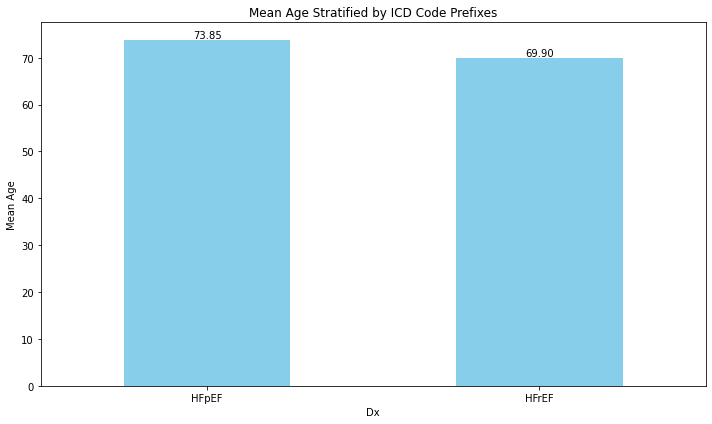

In [205]:
import matplotlib.pyplot as plt

# Assuming hf_ce_lab is your DataFrame
hf_ce_lab['dx'] = np.where(hf_ce_lab['icd_code'].str.startswith(('I502', '4282')), 'HFrEF', 'HFpEF')

# Calculate the mean values for each group
mean_values = hf_ce_lab.groupby('dx')['age'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = mean_values.plot(kind='bar', color='skyblue')
plt.xlabel('Dx')
plt.ylabel('Mean Age')
plt.title('Mean Age Stratified by ICD Code Prefixes')
plt.xticks(rotation=0)

# Add direct labels (values) on top of the bars
for bar, label in zip(ax.patches, mean_values.values):
    height = bar.get_height()
    ax.annotate(f'{label:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

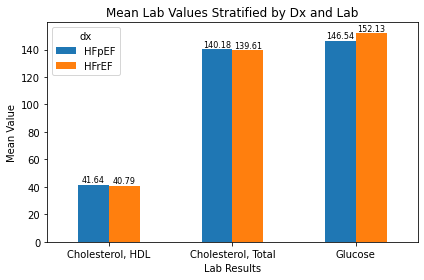

In [204]:
import matplotlib.pyplot as plt

# Calculate the mean values for each group, excluding 'probnp'
mean_values = hf_ce_lab[~hf_ce_lab['label_lab'].str.contains('pro')].groupby(['dx', 'label_lab'])['valuenum'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = mean_values.pivot(index='label_lab', columns='dx', values='valuenum').plot(kind='bar', rot=0)
plt.xlabel('Lab Results')
plt.ylabel('Mean Value')
plt.title('Mean Lab Values Stratified by Dx and Lab')
plt.legend(title='dx')

# Add direct labels (values) on top of the bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.1, f'{mean_values.iloc[i, 2]:.2f}',
        ha='center', va='bottom', fontsize=8, color='black'
    )

plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

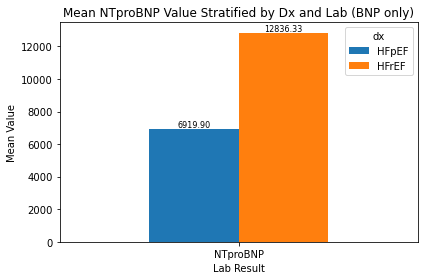

In [203]:

# Calculate the mean values for 'bnp' only
mean_bnp_values = hf_ce_lab[hf_ce_lab['label_lab'].str.contains('pro')].groupby(['dx', 'label_lab'])['valuenum'].mean().reset_index()

# Create a bar plot for 'bnp'
plt.figure(figsize=(10, 6))
ax = mean_bnp_values.pivot(index='label_lab', columns='dx', values='valuenum').plot(kind='bar', rot=0)
plt.xlabel('Lab Result')
plt.ylabel('Mean Value')
plt.title('Mean NTproBNP Value Stratified by Dx and Lab (BNP only)')
plt.legend(title='dx')

# Add direct labels (values) on top of the bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.1, f'{mean_bnp_values.iloc[i, 2]:.2f}',
        ha='center', va='bottom', fontsize=8, color='black'
    )

plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

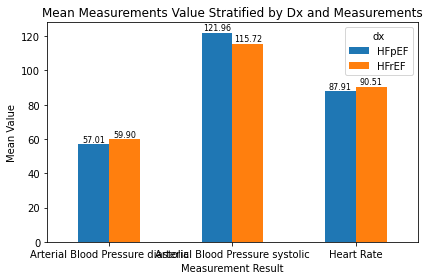

In [202]:
import matplotlib.pyplot as plt

# Calculate the mean values for 'bnp' only
mean_bnp_values = hf_ce_lab.groupby(['dx', 'label_ce'])['value'].mean().reset_index()

# Create a bar plot for 'bnp'
plt.figure(figsize=(10, 6))
ax = mean_bnp_values.pivot(index='label_ce', columns='dx', values='value').plot(kind='bar', rot=0)
plt.xlabel('Measurement Result')
plt.ylabel('Mean Value')
plt.title('Mean Measurements Value Stratified by Dx and Measurements')
plt.legend(title='dx')

# Add direct labels (values) on top of the bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.1, f'{mean_bnp_values.iloc[i, 2]:.2f}',
        ha='center', va='bottom', fontsize=8, color='black'
    )

plt.tight_layout()
plt.show()


<Figure size 864x432 with 0 Axes>

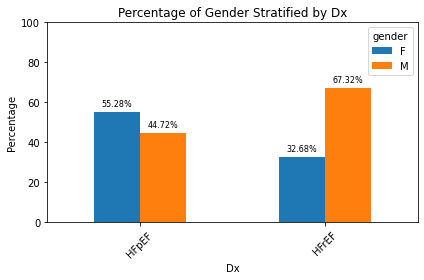

In [219]:
import matplotlib.pyplot as plt

# Calculate the percentage of 'gender' values stratified by 'dx'
percentage_values = (
    hf_ce_lab.groupby(['dx', 'gender'])['subject_id'].count() / hf_ce_lab.groupby('dx')['subject_id'].count() * 100
)
percentage_values = percentage_values.reset_index()

# Rename columns for clarity
percentage_values.columns = ['dx', 'gender', 'percentage']

# Create a bar plot for percentages stratified by 'dx'
plt.figure(figsize=(12, 6))
ax = percentage_values.pivot(index='dx', columns='gender', values='percentage').plot(kind='bar', stacked=False, rot=45)
plt.xlabel('Dx')
plt.ylabel('Percentage')
plt.title('Percentage of Gender Stratified by Dx')

# Add direct labels (values) on top of the bars for both genders
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.2f}%',
        ha='center', va='bottom', fontsize=8, color='black'
    )

# Set the y-axis limit to 100%
plt.ylim(0, 100)

plt.tight_layout()
plt.show()
